In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('marketing_customer_analysis_clean.csv')

In [2]:
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [3]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
categoricals_df = df.select_dtypes(include = 'object')

In [6]:
categoricals_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A
10908,WA60547,California,No,Premium,College,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [7]:
numericals_df = df.select_dtypes(include = 'number')

In [8]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [9]:
nominals_df = pd.get_dummies(categoricals_df[["state", "response", "employmentstatus", "gender", "location_code", "marital_status", "policy_type", "policy", "sales_channel", "vehicle_class", "vehicle_type"]], dtype=int)


In [10]:
nominals_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


In [11]:
categoricals_df["renew_offer_type"].unique()

array(['Offer3', 'Offer4', 'Offer2', 'Offer1'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder = LabelEncoder()

In [14]:
for column in ["renew_offer_type", "education", "coverage", "vehicle_size"]:
    categoricals_df[column] = label_encoder.fit_transform(categoricals_df[column])

In [15]:
categoricals_df

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,0,1,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,2,Agent,Four-Door Car,1,A
1,KX64629,California,No,0,1,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,3,Call Center,Four-Door Car,1,A
2,LZ68649,Washington,No,0,0,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,2,Call Center,SUV,1,A
3,XL78013,Oregon,Yes,1,1,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,1,Branch,Four-Door Car,1,A
4,QA50777,Oregon,No,2,0,2011-01-17,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,0,Branch,Four-Door Car,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,2,0,2011-01-19,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,2,Web,Luxury Car,1,A
10906,KX53892,Oregon,No,0,1,2011-01-06,Employed,F,Urban,Married,Personal Auto,Personal L3,1,Branch,Four-Door Car,1,A
10907,TL39050,Arizona,No,1,0,2011-02-06,Employed,F,Rural,Married,Corporate Auto,Corporate L3,0,Web,Luxury SUV,1,A
10908,WA60547,California,No,2,1,2011-02-13,Employed,F,Urban,Divorced,Personal Auto,Personal L1,0,Branch,SUV,1,A


In [16]:
ordinal_df = categoricals_df[["renew_offer_type", "education", "coverage", "vehicle_size"]]

In [17]:
ordinal_df

,renew_offer_type,education,coverage,vehicle_size
0,2,1,0,1
1,3,1,0,1
2,2,0,0,1
3,1,1,1,1
4,0,0,2,1
...,...,...,...,...
10905,2,0,2,1
10906,1,1,0,1
10907,0,0,1,1
10908,0,1,2,1


In [18]:
categoricals_df = pd.concat([ordinal_df, nominals_df], axis=1)

In [19]:
categoricals_df

,renew_offer_type,education,coverage,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,2,1,0,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,3,1,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,2,0,0,1,0,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
3,1,1,1,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,2,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2,0,2,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,1
10906,1,1,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
10907,0,0,1,1,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,2,1,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [20]:
numericals_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [36]:
df = pd.concat([numericals_df, categoricals_df], axis=1)

In [37]:
df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,0.101171,1.0,...,0,0,0,1,0,0,0,0,0,1
1,1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.257445,0.0,...,0,1,0,1,0,0,0,0,0,1
2,2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,0.165875,1.0,...,0,1,0,0,0,0,1,0,0,1
3,3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.167263,0.0,...,1,0,0,1,0,0,0,0,0,1
4,4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.244657,0.0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,0.167823,0.000000,0.810127,0.432831,0.404040,0.076851,0.750,0.419717,0.0,...,0,0,1,0,1,0,0,0,0,1
10906,10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.094333,0.0,...,1,0,0,1,0,0,0,0,0,1
10907,10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,0.131763,1.0,...,0,0,1,0,0,1,0,0,0,1
10908,10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.800000,0.625,0.213674,1.0,...,1,0,0,0,0,0,1,0,0,1


In [21]:
scaler = MinMaxScaler()

In [24]:
numerical_columns = ["customer_lifetime_value", "income", "monthly_premium_auto", 
                     "months_since_last_claim", "months_since_policy_inception",
                     "number_of_open_complaints", "number_of_policies", 
                     "total_claim_amount", "month"]

# Fit and transform the numerical data
numericals_scaled = scaler.fit_transform(numericals)

# Create a new DataFrame with the scaled numerical features
numericals_scaled_df = pd.DataFrame(numericals_scaled, columns=numerical_columns)


In [30]:
numericals_scaled_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,0.101171,1.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,0.257445,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,0.165875,1.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.167263,0.0
4,0.087527,0.236795,0.236287,0.432831,0.313131,0.076851,0.750,0.244657,0.0
...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.432831,0.404040,0.076851,0.750,0.419717,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.094333,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,0.131763,1.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.800000,0.625,0.213674,1.0


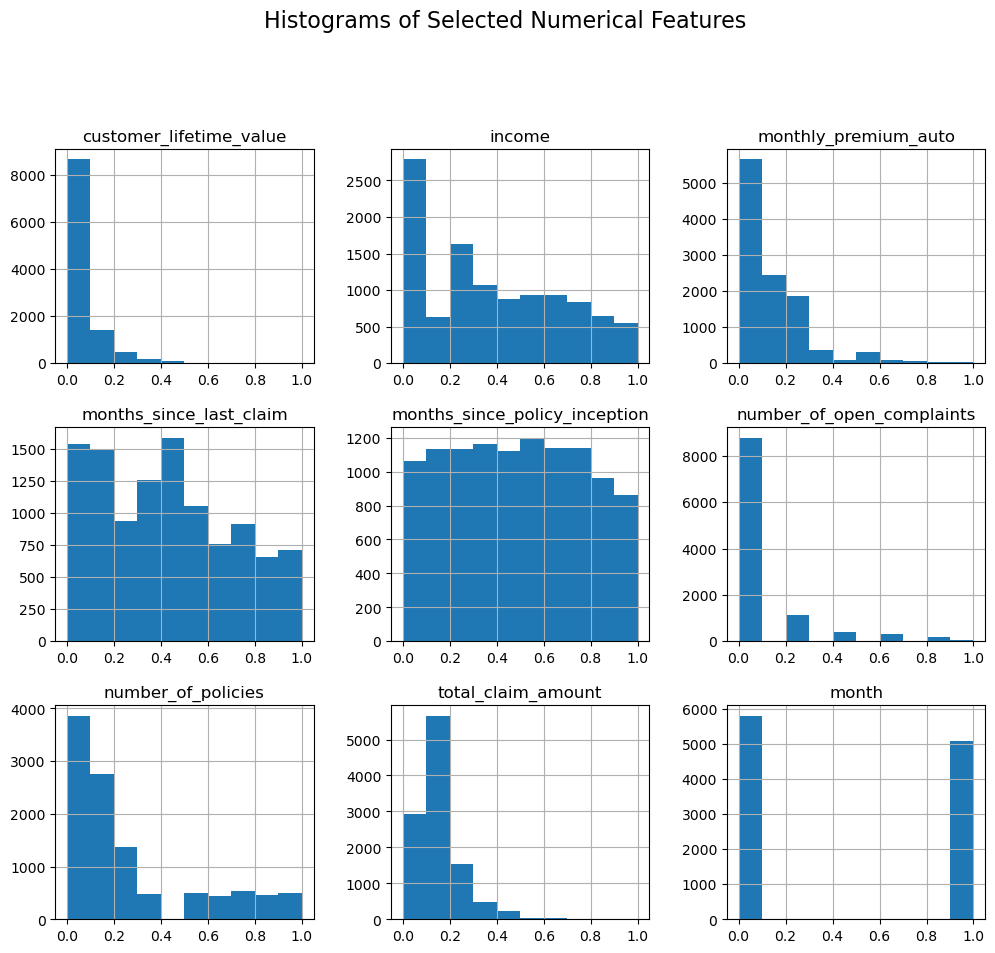

In [28]:
import matplotlib.pyplot as plt
# Assuming 'numericals_df' is your DataFrame with numerical features
# Replace it with your actual DataFrame
# Display histograms for specific numerical columns
numericals_df[numerical_columns].hist(bins=10, figsize=(12, 10), layout=(3, 3), sharex=False)
plt.suptitle('Histograms of Selected Numerical Features', y=1.02, fontsize=16)
plt.show()

/Users/hana/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


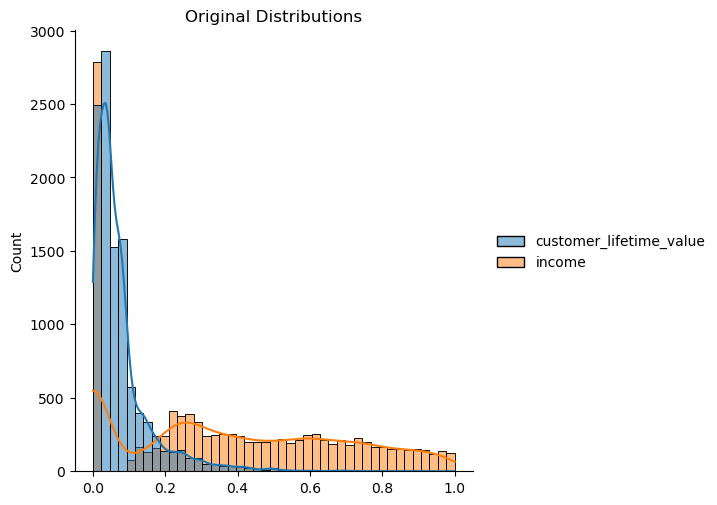

In [32]:
# Visualize the original distributions
sns.displot(numericals_df[['customer_lifetime_value', 'income']], kde=True)
plt.title("Original Distributions")
plt.show()

/Users/hana/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


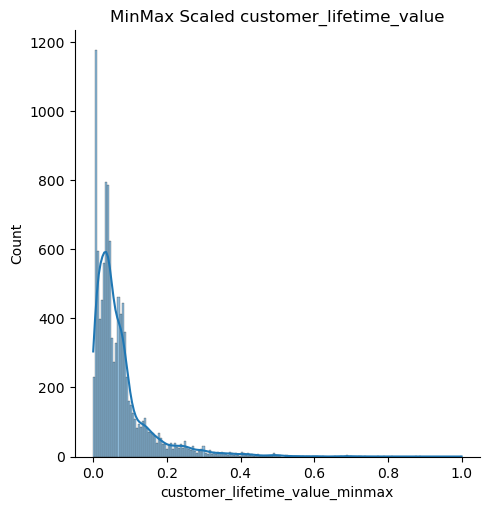

In [33]:
# Variable varA: MinMax Scaling
minmax_scaler = MinMaxScaler()
numericals_df['customer_lifetime_value_minmax'] = minmax_scaler.fit_transform(
    numericals_df[['customer_lifetime_value']].to_numpy().reshape(-1, 1)
)

# Visualize the rescaled varA
sns.displot(numericals_df['customer_lifetime_value_minmax'], kde=True)
plt.title("MinMax Scaled customer_lifetime_value")
plt.show()


<Axes: >

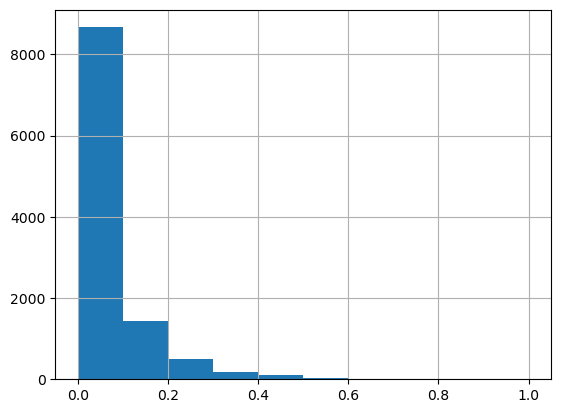

In [38]:
numericals_df['customer_lifetime_value_minmax'].hist()

/Users/hana/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


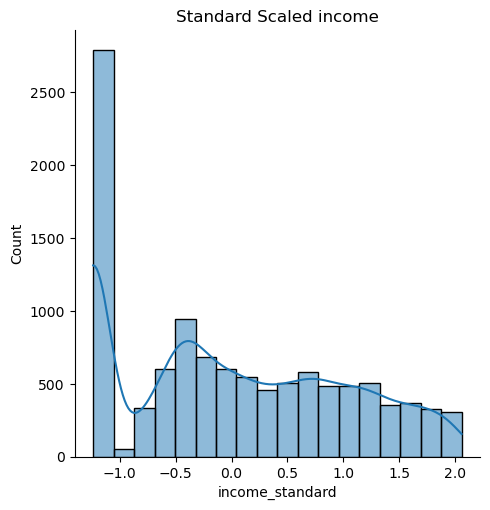

Mean of income_standard: 7.945574130406253e-17
Standard Deviation of income_standard: 1.0000458326649537


In [34]:
# Variable varB: Standard Scaling
standard_scaler = StandardScaler()
numericals_df['income_standard'] = standard_scaler.fit_transform(
    numericals_df[['income']].to_numpy().reshape(-1, 1)
)

# Visualize the standardized varB
sns.displot(numericals_df['income_standard'], kde=True)
plt.title("Standard Scaled income")
plt.show()

# Print mean, std for varB
print(f"Mean of income_standard: {numericals_df['income_standard'].mean()}")
print(f"Standard Deviation of income_standard: {numericals_df['income_standard'].std()}")

<Axes: >

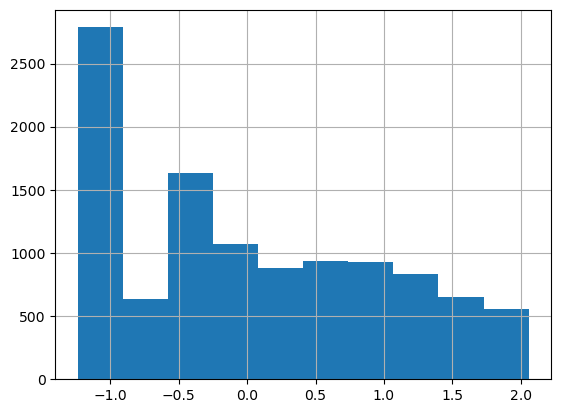

In [39]:
numericals_df['income_standard'].hist()